In [14]:
from model.diffusion import FEADataset, Trainer

In [15]:
dataset = FEADataset(
    folder='data/newtestdata',
    augmentation=False,
    image_size=512,
    conditions_per_plate=1,
    num_steps=2,
)
print(len(dataset))

40


In [16]:
# from tqdm.auto import tqdm
# startindex = 0
# errors = []
# for i in tqdm(range(startindex, len(dataset)), total=len(dataset), initial=startindex):
#     plate_index = (i // (dataset.samples_per_plate)) + 1
#     try:
#         x = dataset[i]
#     except Exception as e:
#         errors.append(plate_index) if plate_index not in errors else None

In [17]:
# print(len(errors))
# print(errors)

In [18]:
import torchvision.transforms.functional as TF
import torch
def unnormalize_from_negative_one_to_one(tensor):
        return (tensor + 1.0) / 2.0
def create_view_friendly_image(image):
        image = unnormalize_from_negative_one_to_one(image)
        # image = TF.invert(image)
        image = image * 255.0
        # image = image.repeat(3, 1, 1)
        # image = TF.to_pil_image(image, mode='F')
        return image

In [19]:
# import torchvision.transforms.functional as TF
# import torch
# def unnormalize_from_negative_one_to_one(tensor):
#         return (tensor + 1.0) / 2.0
# def create_view_friendly_image(image):
#         image = unnormalize_from_negative_one_to_one(image)
#         image = TF.invert(image)
#         image = image * 255.0
#         # image = image.repeat(3, 1, 1)
#         image = TF.to_pil_image(image)
#         return image

In [20]:
index = 21
sample = dataset[index]
# for key, value in sample.items():
    # print(key, value.shape)
print(sample['plate_index'], sample['condition_index'], sample['iteration_index'])

tensor(22) tensor(1) tensor(1)


In [21]:
print(torch.unique(unnormalize_from_negative_one_to_one(sample['forces'])))
print(unnormalize_from_negative_one_to_one(sample['geometry']))

tensor([-3.7578, -3.7578, -3.7315, -3.7315, -2.6162, -2.6162, -1.3722, -1.3722,
         0.5000,  2.6611,  2.6611,  3.4577,  3.4577,  3.7616,  3.7616,  3.9529,
         3.9529,  4.0375,  4.3843,  4.3843,  4.6614,  4.6614,  4.7299,  4.7299])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [22]:
# sample['geometry'] = (unnormalize_from_negative_one_to_one(sample['geometry']) > 0.5).float()

In [23]:
# sample['displacement'] = sample['displacement'] * (1.0 - unnormalize_from_negative_one_to_one(sample['constraints']))
 
# error = sample['displacement'] * (1.0 - unnormalize_from_negative_one_to_one(sample['constraints']))
sample['displacement'] = unnormalize_from_negative_one_to_one(sample['displacement']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['displacement'] = (sample['displacement'] * 2.0) - 1.0
sample['constraints'] = unnormalize_from_negative_one_to_one(sample['constraints']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['constraints'] = (sample['constraints'] * 2.0) - 1.0
sample['previous_iteration'] = unnormalize_from_negative_one_to_one(sample['previous_iteration']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['previous_iteration'] = (sample['previous_iteration'] * 2.0) - 1.0
# sample['displacement'] = sample['displacement'] - error

In [24]:
naman1 = torch.unique(sample['forces'][0])
print((torch.exp(torch.abs(naman1))-1)*torch.sign(naman1))
print(torch.unique(sample['forces'][0]))

tensor([-4990.9985, -4990.9937,   -41.2857,   -41.2857,     0.0000,   369.6665,
          369.6667,   679.7141,   679.7144,   996.9994,   996.9999,  4719.9956,
         4720.0000])
tensor([-8.5156, -8.5156, -3.7444, -3.7444,  0.0000,  5.9153,  5.9153,  6.5231,
         6.5231,  6.9058,  6.9058,  8.4598,  8.4598])


In [25]:
naman1 = torch.unique(sample['materials'][1])
print((torch.exp(torch.abs(naman1))-1)*torch.sign(naman1))
print(torch.unique(sample['materials'][0]))

tensor([0.0000, 0.2840, 0.2840, 0.3231, 0.3231, 0.4049, 0.4049, 0.6471, 0.6471])
tensor([0.0000e+00, 9.9503e-03, 9.9503e-03, 1.1513e+01, 1.1513e+01, 1.1695e+01,
        1.1695e+01, 1.2926e+01, 1.2926e+01])


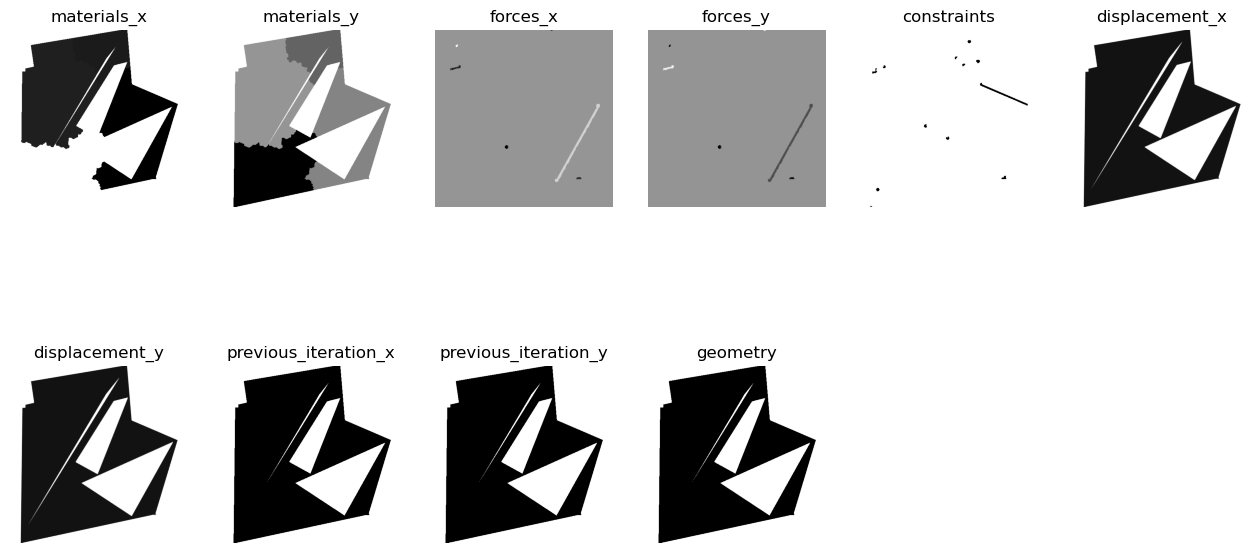

In [26]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16, 8))
index = 1
for key, value in reversed(sample.items()):
    if value.shape.numel() == 1:
        continue
    if value.shape[0] == 2:
        figure.add_subplot(2, 6, index)
        plt.title(key + "_x")
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[0][None, ...]))
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys')
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        figure.add_subplot(2, 6, index)
        plt.title(key + "_y")
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[1][None, ...]))
        plt.imshow(create_view_friendly_image(value[1][None, ...]).squeeze(), cmap='Greys')
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
    else:
        figure.add_subplot(2, 6, index)
        plt.title(key)
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[0][None, ...]))
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        